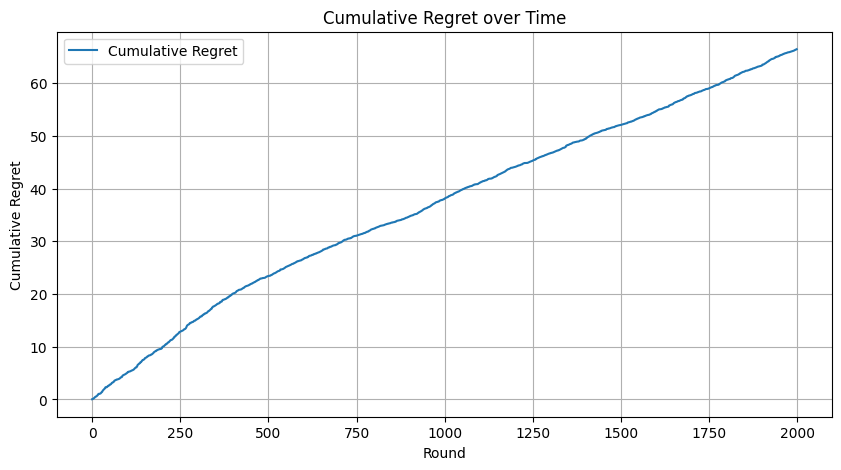

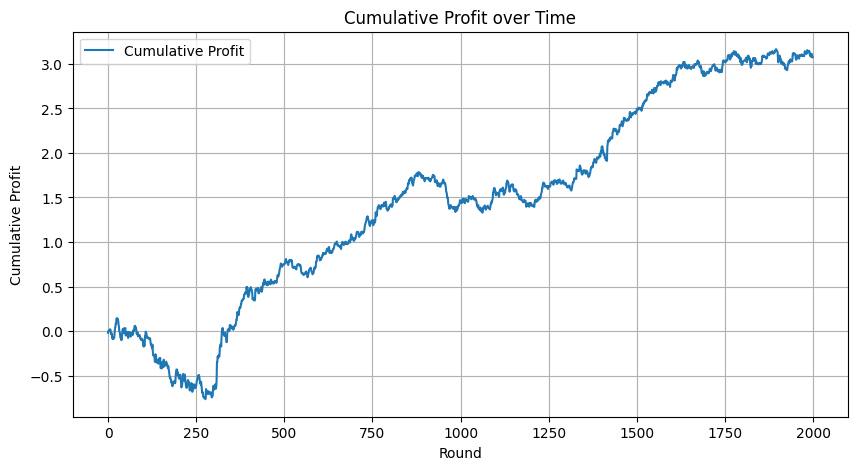

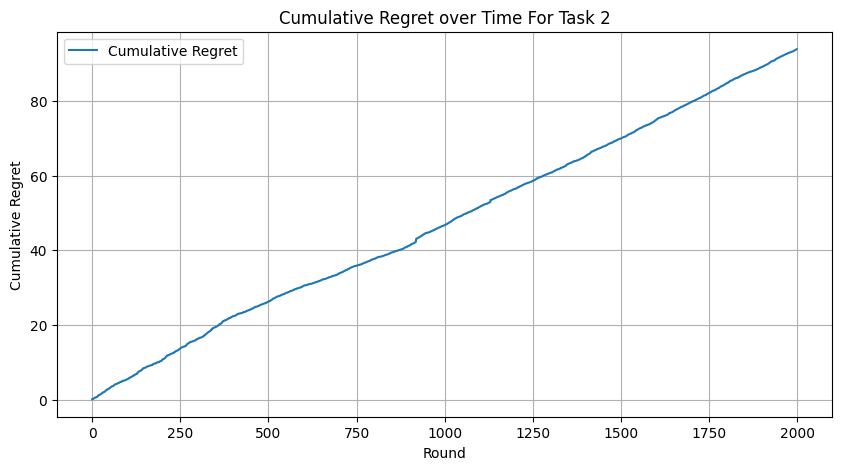

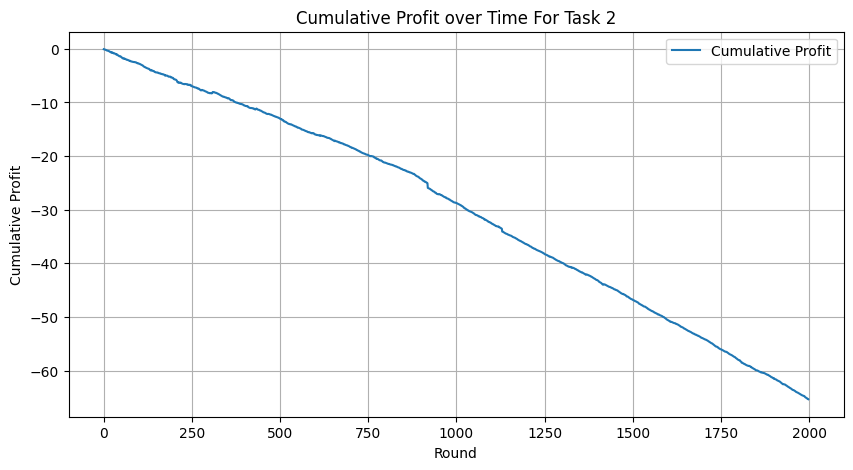

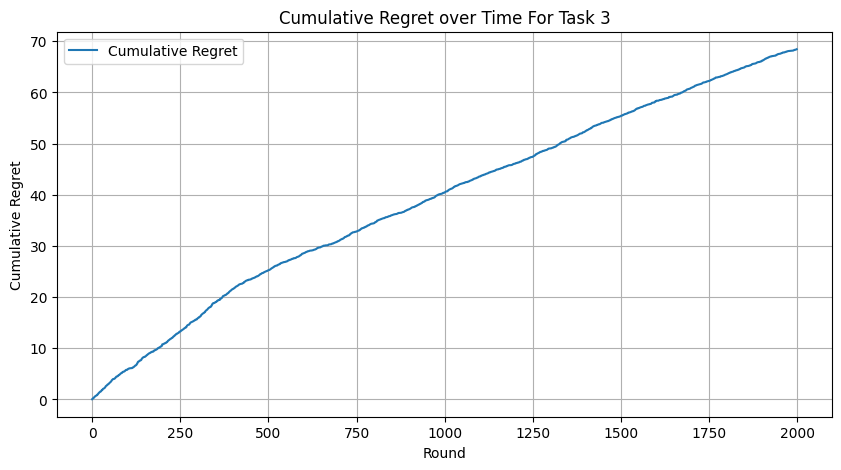

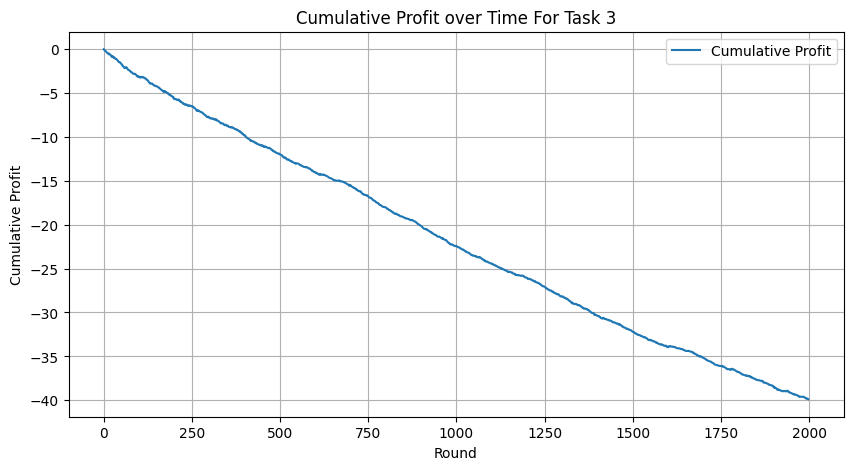

In [2]:
########################################################################################################################################################################################################################################################################################
########################################################################################################################################################################################################################################################################################
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------GEORGIOS APOLLON TAOUXIS-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
########################################################################################################################################################################################################################################################################################
########################################################################################################################################################################################################################################################################################


import random
import matplotlib.pyplot as plt
import csv
import math

########################################################################################################################################################################################################################################################################################
########################################################################################################################################################################################################################################################################################
#TASK 1--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Regret = 0
profit = 0
cumulative_profit = 0
cumulative_profits =[]
# track cumulative regret
cumulative_regret = 0
cumulative_regrets = [] # array which will be used to plot the evolution of regret over time

etta = math.sqrt(math.log(10)/2000)
# initialize a list to store the rows
data = []
weights = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}
probabilities ={1: 1/10, 2: 1/10, 3: 1/10, 4: 1/10, 5: 1/10, 6: 1/10, 7: 1/10, 8: 1/10, 9: 1/10, 10: 1/10}

# Open the CSV file
with open('stocks(1).csv', mode='r') as file:
    # Create a CSV reader object with ',' as the delimiter
    csv_reader = csv.reader(file, delimiter=',')
    
    # get all data from file
    for row in csv_reader:
        float_row = [float(value) for value in row]
        data.append(float_row)

# for each row, therefore each day i get a choice based on the probabilities of each stock
for row in data:
    choice = random.choices(list(probabilities.keys()), list(probabilities.values()))
    
    # based on this choice i get the stock percentage increase/decrease, the -1 is because the keys in probabilities begin with 1
    chosen_value = row[choice[0] - 1]
    # get the biggest value of stock percentage increase below here
    true_value = max(row)

    # this is the profit since we have only invested 1 euro and we sell at the night/next day so that is what we get or lose from the stock choice
    profit = chosen_value
    cumulative_profit += profit
    cumulative_profits.append(cumulative_profit)
    
    # this is how regret is calculated here, it is what would have been the best choice minus the choice we made
    Regret = true_value - chosen_value
    cumulative_regret += Regret
    cumulative_regrets.append(cumulative_regret)

    # update all weights based on each own's "regret"
    for key in weights:
        reward = true_value - row[key - 1]
        weights[key] = weights[key]*(1-etta)**reward
    
    #update probabilities with the updated weights
    total_weight = sum(weights.values())
    for key in weights:
        probabilities[key] = weights[key] / total_weight


# Plotting the cumulative regret
plt.figure(figsize=(10, 5))
plt.plot(cumulative_regrets, label='Cumulative Regret')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cumulative profit
plt.figure(figsize=(10, 5))
plt.plot(cumulative_profits, label='Cumulative Profit')
plt.xlabel('Round')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit over Time')
plt.legend()
plt.grid(True)
plt.show()

########################################################################################################################################################################################################################################################################################
########################################################################################################################################################################################################################################################################################
#TASK 2--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Regret = 0
profit = 0
cumulative_profit = 0
cumulative_profits =[]
# Track cumulative regret
cumulative_regret = 0
cumulative_regrets = [] # Array which will be used to plot the evolution of regret over time

etta = math.sqrt(math.log(10)/2000)
# Initialize a list to store the rows
data = []
weights = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}
probabilities ={1: 1/10, 2: 1/10, 3: 1/10, 4: 1/10, 5: 1/10, 6: 1/10, 7: 1/10, 8: 1/10, 9: 1/10, 10: 1/10}

transaction_fees ={1: 0.005, 2: 0.01, 3: 0.015, 4: 0.02, 5: 0.025, 6: 0.03, 7: 0.035, 8: 0.04, 9: 0.045, 10: 0.05}

# Open the CSV file
with open('stocks(1).csv', mode='r') as file:
    # Create a CSV reader object with ',' as the delimiter
    csv_reader = csv.reader(file, delimiter=',')
    
    # Iterate over each row in the CSV file and add to the list
    for row in csv_reader:
        float_row = [float(value) for value in row]
        data.append(float_row)

for row in data:
    choice = random.choices(list(probabilities.keys()), list(probabilities.values()))
    chosen_key = choice[0]
    transaction_fee = transaction_fees[chosen_key]
    
    # Apply transaction fee to the chosen value and true value
    chosen_value = row[chosen_key - 1] - transaction_fee

    # calculating max value while also taking into account the transaction fees in such a way that the max value is tha max of value - transaction_fee
    true_value = max(row[key - 1] - transaction_fees[key] for key in transaction_fees.keys())

    profit = chosen_value  # Consider profit after transaction fee
    cumulative_profit += profit
    cumulative_profits.append(cumulative_profit)
    
    Regret = true_value - chosen_value
    cumulative_regret += Regret
    cumulative_regrets.append(cumulative_regret)

    for key in weights:
        reward = true_value - row[key - 1] - transaction_fees[key]
        weights[key] = weights[key]*(1-etta)**reward
    
    total_weight = sum(weights.values())
    for key in weights:
        probabilities[key] = weights[key] / total_weight


# Plotting the cumulative regret
plt.figure(figsize=(10, 5))
plt.plot(cumulative_regrets, label='Cumulative Regret')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time For Task 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cumulative profit
plt.figure(figsize=(10, 5))
plt.plot(cumulative_profits, label='Cumulative Profit')
plt.xlabel('Round')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit over Time For Task 2')
plt.legend()
plt.grid(True)
plt.show()

#####################################################################################################################################################################################################################################
########################################################################################################################################################################################################################################
# -------------------------------------------------------------TASK 3--------------------------------------------------------------------------------------------------------------------------------------------------------------

loss_arrow =0
Regret = 0
profit = 0
cumulative_profit = 0
cumulative_profits =[]
# Track cumulative regret
cumulative_regret = 0
cumulative_regrets = [] # Array which will be used to plot the evolution of regret over time

etta = math.sqrt(math.log(10)/2000)
# Initialize a list to store the rows
data = []
weights = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}
probabilities ={1: 1/10, 2: 1/10, 3: 1/10, 4: 1/10, 5: 1/10, 6: 1/10, 7: 1/10, 8: 1/10, 9: 1/10, 10: 1/10}

transaction_fees ={1: 0.005, 2: 0.01, 3: 0.015, 4: 0.02, 5: 0.025, 6: 0.03, 7: 0.035, 8: 0.04, 9: 0.045, 10: 0.05}

# Open the CSV file
with open('stocks(1).csv', mode='r') as file:
    # Create a CSV reader object with ',' as the delimiter
    csv_reader = csv.reader(file, delimiter=',')
    
    # Iterate over each row in the CSV file and add to the list
    for row in csv_reader:
        float_row = [float(value) for value in row]
        data.append(float_row)

for row in data:
    choice = random.choices(list(probabilities.keys()), list(probabilities.values()))
    chosen_key = choice[0]
    transaction_fee = transaction_fees[chosen_key]
    
    # Apply transaction fee to the chosen value and true value
    chosen_value = row[chosen_key - 1] - transaction_fee
    true_value = max(row[key - 1] - transaction_fees[key] for key in transaction_fees.keys())
    
    #store the chosen probability and weight for update
    chosen_probability = probabilities[chosen_key]
    chosen_weight = weights[chosen_key]

    profit = chosen_value  # Consider profit after transaction fee
    cumulative_profit += profit
    cumulative_profits.append(cumulative_profit)
    
    Regret = true_value - chosen_value
    cumulative_regret += Regret
    cumulative_regrets.append(cumulative_regret)

    #calculate the loss in the bandit algorithm way
    loss_arrow = Regret / chosen_probability

    # Update the chosen weight
    new_weight = chosen_weight * (1 - etta) ** loss_arrow
    weights[chosen_key] = new_weight
    
    # update all weights
    total_weight = sum(weights.values())
    for key in weights:
        probabilities[key] = weights[key] / total_weight


# Plotting the cumulative regret
plt.figure(figsize=(10, 5))
plt.plot(cumulative_regrets, label='Cumulative Regret')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time For Task 3')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cumulative profit
plt.figure(figsize=(10, 5))
plt.plot(cumulative_profits, label='Cumulative Profit')
plt.xlabel('Round')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit over Time For Task 3')
plt.legend()
plt.grid(True)
plt.show()

